<img src='https://comunidadnautica.com/wp-content/uploads/2020/10/Titanic.jpg'>

# **La Travesía del Titanic a través de los Datos**

Hace más de un siglo, el Titanic partió de Southampton en un viaje que prometía ser lujoso y memorable. En este análisis de datos, nos sumergiremos en la riqueza de información proporcionada por el conjunto de datos del Titanic, como si estuviéramos abordando el mismo barco, explorando los pasillos de sus estadísticas para descubrir los misterios detrás de las cifras y conectarnos con las historias de aquellos que viajaron en este majestuoso navío.

Una de las razones por las que el naufragio resultó en tal pérdida de vidas fue la falta de botes salvavidas para los pasajeros y la tripulación. A medida que desentrañamos las cifras, recordemos que, de alguna manera, este análisis refleja la misma lucha que enfrentaron aquellos que buscaban desesperadamente un medio de escape en aquella fatídica noche. Aunque hubo cierto elemento de suerte en sobrevivir al hundimiento, algunos grupos de personas tenían más probabilidades de sobrevivir que otros, como mujeres, niños y la clase alta.

### **Conjunto de Datos del Titanic**

El conjunto de datos del Titanic, un registro detallado de las 1309 personas involucradas en el naufragio, se convierte en nuestro mapa estelar en esta travesía. Cada punto de datos es una estrella que ilumina el oscuro océano de la historia, indicándonos quiénes fueron rescatados por la luz de la esperanza y quiénes quedaron atrapados en las profundidades de la tragedia.

### **Objetivos**

1. **Composición General de los Pasajeros:**
   - Comencemos nuestra travesía explorando la composición general de los pasajeros. ¿Quiénes eran? ¿Cuál era la distribución de edades, género y clase social a bordo del Titanic?

2. **Distribución de Sobrevivientes:**
   - Demos un paso más allá y examinemos cómo se distribuyen los sobrevivientes en comparación con los no sobrevivientes. ¿Qué nos revela la tasa de supervivencia sobre las diferentes categorías de pasajeros?

3. **Correlación entre Clase Social y Supervivencia:**
   - La sociedad del Titanic estaba estratificada por clases. ¿Hubo alguna correlación aparente entre la clase social y las posibilidades de sobrevivencia? Vamos a sumergirnos en estos estratos sociales y desentrañar sus secretos.

### **Análisis Exploratorio**

4. **Calidad de Datos:**
   - Nuestra travesía comienza asegurándonos de que nuestro mapa de datos esté libre de obstáculos. ¿Existen duplicados o valores nulos que puedan distorsionar nuestra visión? Aclaremos las aguas antes de emprender nuestro viaje.

5. **Distribución de Edades:**
   - Las edades de los pasajeros añaden capas a nuestra narrativa. ¿Cómo se distribuyen las edades? ¿Existen patrones generacionales que puedan arrojar luz sobre las experiencias a bordo?

6. **Composición de Género en Cada Clase:**
   - Los roles de género desempeñaron un papel crucial en la sociedad de la época. Investigaremos si la composición de género varió entre las diferentes clases, revelando matices de la vida a bordo.

### **Preguntas Específicas**

7. **Distribución de Tarifas por Clase:**
   - Las tarifas pagadas por los pasajeros pueden revelar detalles sobre su posición económica. ¿Cómo se distribuyen las tarifas en cada clase? ¿Reflejan fielmente la jerarquía social a bordo?

8. **Distribución de Edades de Sobrevivientes vs. No Sobrevivientes:**
   - ¿La edad influyó en las posibilidades de sobrevivir? Analizaremos la distribución de edades de aquellos que lograron la hazaña frente a los que no.

9. **Familias a Bordo y Tasas de Supervivencia:**
   - La presencia de familias a bordo añade un componente humano único. ¿Cómo afectó la unidad familiar a las tasas de supervivencia? Investigaremos este aspecto clave de la vida a bordo.


In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import svm 
import re
sns.set_style("whitegrid")

In [252]:
data = pd.read_csv("titanic3.csv")

### **Diccionario de datos**

1. **PassengerID (ID del Pasajero):**
   - Descripción: Un identificador único asignado a cada pasajero.
   - Uso: Este identificador sirve para distinguir a cada pasajero de manera única en el conjunto de datos.

2. **Survived (Sobrevivió):**
   - Descripción: Indica si el pasajero sobrevivió o no al naufragio.
   - Uso: Es la variable objetivo que se intenta predecir. Puede tomar dos valores: 0 (No sobrevivió) o 1 (Sobrevivió).

3. **Pclass (Clase del Pasajero):**
   - Descripción: Representa la clase en la que viajaba el pasajero.
   - Uso: Puede ser 1 (Primera clase), 2 (Segunda clase) o 3 (Tercera clase). Indica el estatus socioeconómico del pasajero.

4. **Name (Nombre):**
   - Descripción: El nombre del pasajero.
   - Uso: Sirve para identificar a cada pasajero por su nombre.

5. **Sex (Género):**
   - Descripción: El género (sexo) del pasajero.
   - Uso: Puede ser Female (Femenino) o Male (Masculino).


6. **Age (Edad):**
   - Descripción: La edad del pasajero.
   - Uso: Indica la edad del pasajero en años.


7. **Sibsp (Número de hermanos/cónyuges a bordo):**
   - Descripción: La cantidad de hermanos o cónyuges que el pasajero tenía a bordo.
   - Uso: Proporciona información sobre la familia del pasajero.


8. **Parch (Número de padres/hijos a bordo):**
   - Descripción: La cantidad de padres o hijos que el pasajero tenía a bordo.
   - Uso: Ofrece información adicional sobre la composición familiar del pasajero.


9. **Ticket (Número de boleto):**
   - Descripción: El número de boleto del pasajero.
   - Uso: Identifica el boleto asociado a cada pasajero.


10. **Fare (Tarifa):**
    - Descripción: La tarifa pagada por el pasajero.
    - Uso: Indica el costo del pasaje en libras esterlinas.


11. **Cabin (Número de cabina):**
    - Descripción: El número de cabina del pasajero.
    - Uso: Identifica la cabina asignada a cada pasajero.


12. **Embarked (Puerto de Embarque):**
    - Descripción: El puerto desde el cual el pasajero embarcó en el Titanic.
    - Uso: Puede ser C (Cherbourg), Q (Queenstown), o S (Southampton). Indica el punto de partida del viaje del pasajero.

### **Análisis Exploratorio de Datos (EDA)**
**Carga y exploración de datos**

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [254]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Verificamos primero los datos para saber si estos obtiene datos nulos

In [255]:
data.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Se pude comprobar que el dataset **contiene datos nulos**. Por lo tanto seria necesario realizar data wrangling en el dataset antes de realizar los modelos de predicción.

Para el analisis no se tendran en cuenta el nombre,cabina,bote,identificación del cuepo,destino y el numero de ticket. Por lo tanto se precedera a elimiar del dataset a estos campos.

In [256]:
data = data.drop(columns=["cabin","boat","body","home.dest","ticket"])

### Graficas

* Las conclusiones se llevaran a cabo en el ultimo apartado del informe

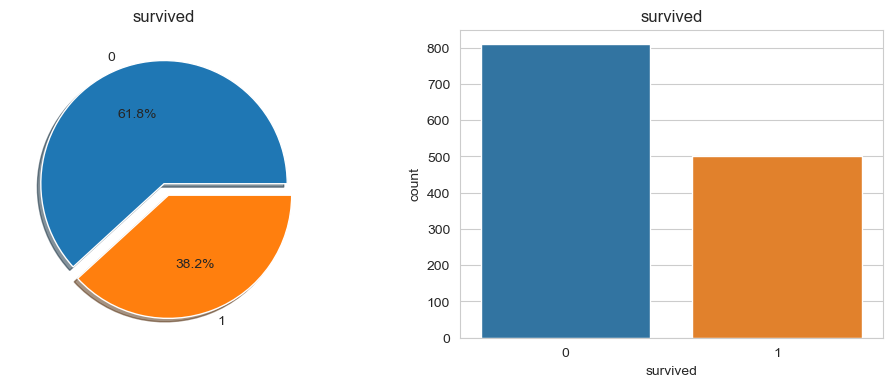

In [257]:
f,ax=plt.subplots(1,2,figsize=(12,4))
data['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('survived')
ax[0].set_ylabel('')
sns.countplot(data,x='survived')
ax[1].set_title('survived')
plt.show()

De los 1309 pasajeros en el dataset, solo alrededor de 500 sobrevivieron, es decir, solo el 38.2% del total del conjunto logró sobrevivir al choque. Necesitamos profundizar más para obtener mejores perspectivas de los datos y ver qué categorías de pasajeros sobrevivieron y quiénes no.

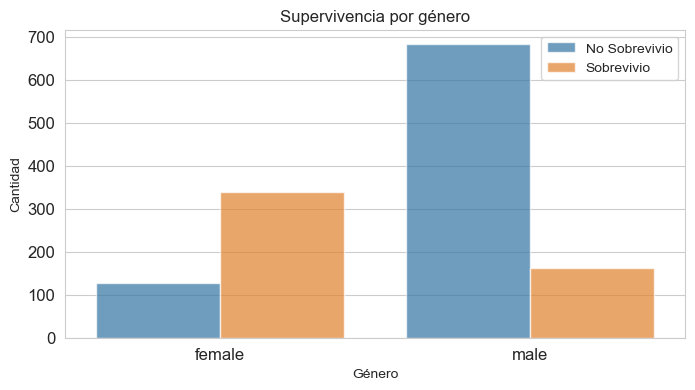

In [258]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x="sex", data=data, hue="survived", alpha=0.7)
ax.set_title("Supervivencia por género")
ax.set_xlabel("Género")
ax.set_ylabel("Cantidad")
ax.legend(("No Sobrevivio","Sobrevivio"))
ax.tick_params(axis='both', labelsize=12)
plt.show()

In [259]:
merc = data.groupby(["sex","survived"],as_index=True)["survived"].count()
merc

sex     survived
female  0           127
        1           339
male    0           682
        1           161
Name: survived, dtype: int64

In [260]:
rate_survived_male = round(161/(682+161),2)*100
rate_survived_female = round(339/(339+127),2)*100
print("Tasa de supervivencia de hombres: ",rate_survived_male,"%")
print("Tasa de supervivencia de mujeres: ",rate_survived_female,"%")

Tasa de supervivencia de hombres:  19.0 %
Tasa de supervivencia de mujeres:  73.0 %


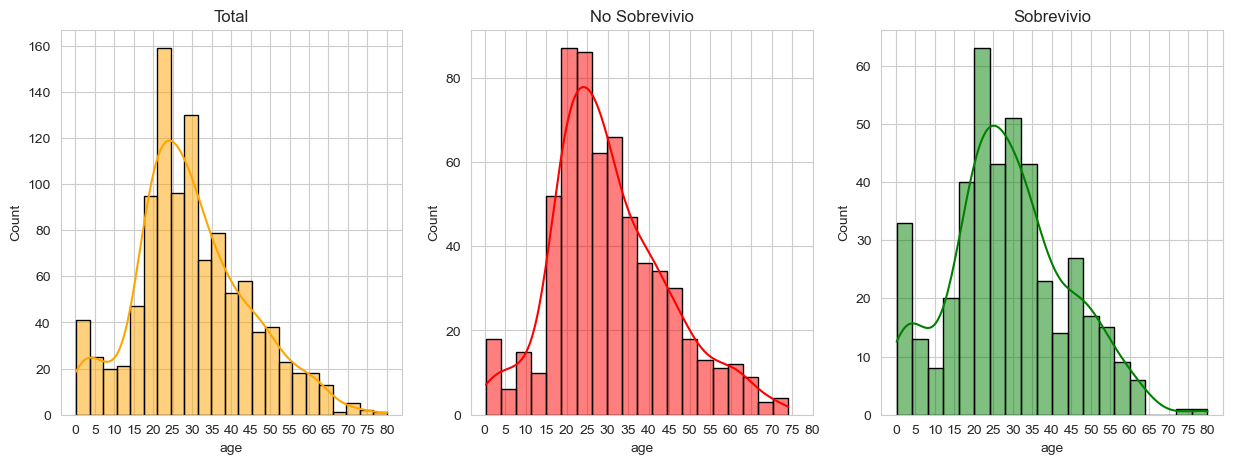

In [261]:
f, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=data["age"], kde=True, edgecolor='black', color='orange', ax=ax[0])
ax[0].set_title('Total')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

sns.histplot(data[data['survived'] == 0]['age'], bins=20, kde=True, edgecolor='black', color='red', ax=ax[1])
ax[1].set_title('No Sobrevivio')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

sns.histplot(data[data['survived'] == 1]['age'], bins=20, kde=True, edgecolor='black', color='green', ax=ax[2])
ax[2].set_title('Sobrevivio')
x3 = list(range(0, 85, 5))
ax[2].set_xticks(x3)
plt.show()

Se salvaron en gran cantidad los niños pequeños (edad < 5)

El pasajero más anciano fue salvado (80 años).

El número máximo de fallecimientos se registró en el grupo de edad de 30 a 40 años.

In [262]:
titulo_regex = re.compile(r',\s(.*?)\.')
titulos_lista = []

for index, row in data.iterrows():
    nombre = row['name']
    titulo_match = titulo_regex.search(nombre)

    if titulo_match:
        titulo = titulo_match.group(1)
        titulos_lista.append(titulo)
    else:
        titulos_lista.append(None)

# Asignar los títulos al DataFrame usando loc para evitar la advertencia
data.loc[:, 'name'] = titulos_lista

In [263]:
data['name'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

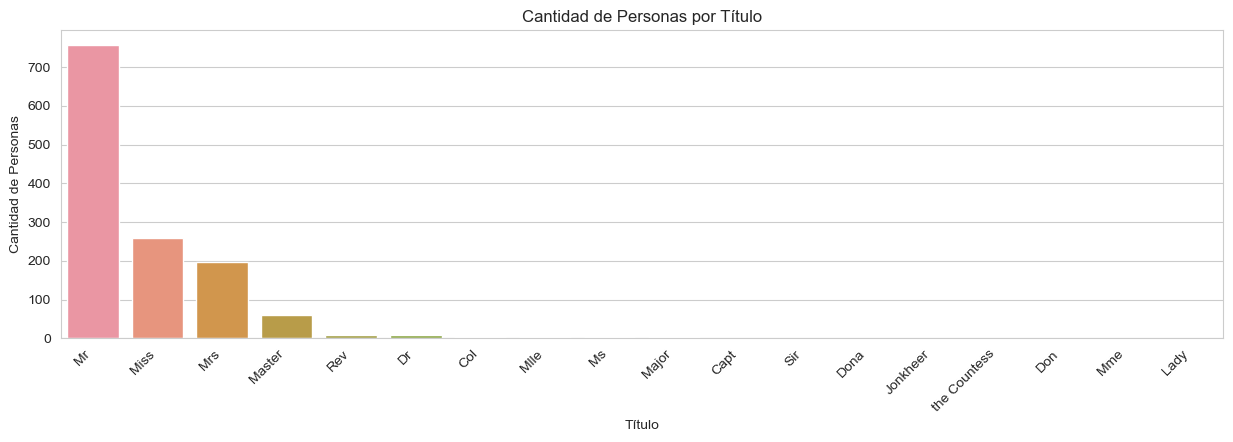

In [264]:
conteo_titulos = data['name'].value_counts().reset_index()
conteo_titulos.columns = ['name', 'Cantidad']
plt.figure(figsize=(15, 4))
sns.barplot(x='name', y='Cantidad', data=conteo_titulos)
plt.xlabel('Título')
plt.ylabel('Cantidad de Personas')
plt.title('Cantidad de Personas por Título')
plt.xticks(rotation=45, ha='right')
plt.show()

In [265]:
data["age"].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

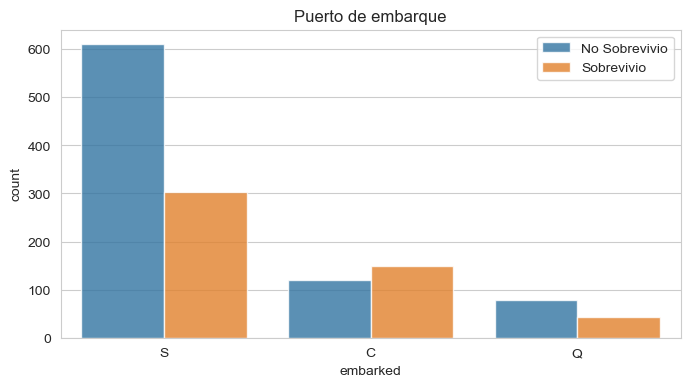

In [266]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x="embarked", data=data ,hue="survived",alpha=0.8)
ax.set_title("Puerto de embarque")
ax.legend(("No Sobrevivio","Sobrevivio"))

In [267]:
data_sibsp = data.groupby(["sibsp"],as_index=False)["sibsp"].count()
data_parch = data.groupby("parch",as_index=False)["parch"].count()

Text(0, 0.5, 'Pasajeros')

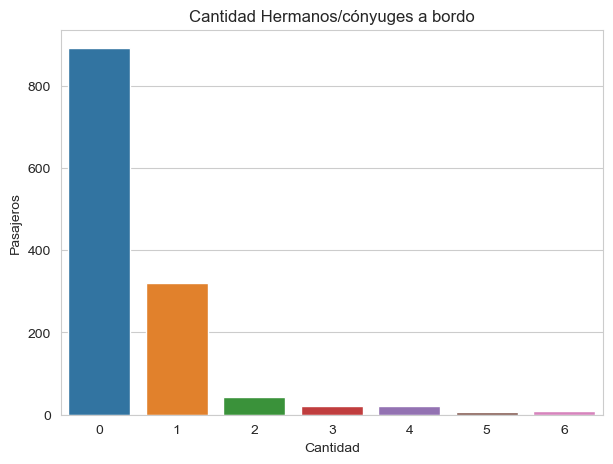

In [268]:
fig,ax = plt.subplots(figsize = (7,5))
ax = sns.barplot(data=data_sibsp, y="sibsp", x=data_sibsp.index)
ax.set_title("Cantidad Hermanos/cónyuges a bordo")
ax.set_xlabel("Cantidad")
ax.set_ylabel("Pasajeros")

Text(0, 0.5, 'Pasajeros')

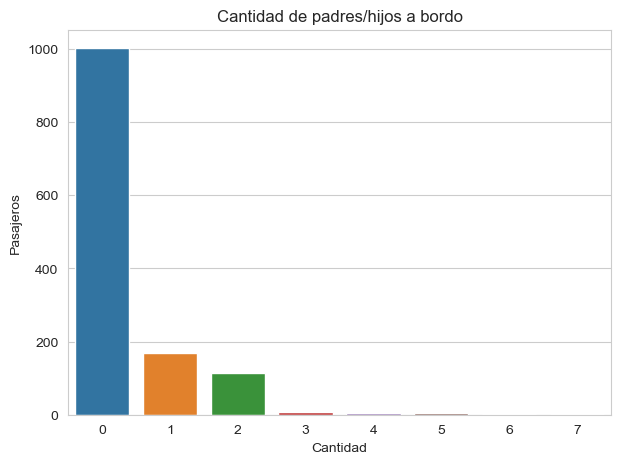

In [269]:
fig,ax = plt.subplots(figsize = (7,5))
ax = sns.barplot(data=data_parch, y="parch", x=data_parch.index)
ax.set_title("Cantidad de padres/hijos a bordo")
ax.set_xlabel("Cantidad")
ax.set_ylabel("Pasajeros")

C:\Users\franf\AppData\Local\Temp\ipykernel_2568\3987919326.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['pclass']==1].fare,ax=ax[0])
C:\Users\franf\AppData\Local\Temp\ipykernel_2568\3987919326.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['pclass']==2].fare,ax=a

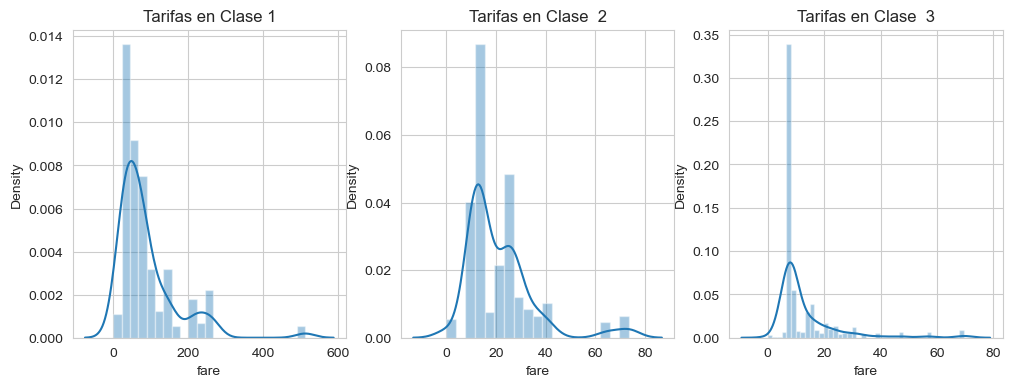

In [270]:
f,ax=plt.subplots(1,3,figsize=(12,4))
sns.distplot(data[data['pclass']==1].fare,ax=ax[0])
ax[0].set_title('Tarifas en Clase 1')
sns.distplot(data[data['pclass']==2].fare,ax=ax[1])
ax[1].set_title('Tarifas en Clase  2')
sns.distplot(data[data['pclass']==3].fare,ax=ax[2])
ax[2].set_title('Tarifas en Clase  3')
plt.show()

Se observa una amplia distribución en las tarifas de los pasajeros en la Clase 1, y esta distribución disminuye a medida que disminuyen los estándares de clase.

In [271]:
label_encoder = LabelEncoder()
data["sex"] = label_encoder.fit_transform(data["sex"])
data["embarked"] = label_encoder.fit_transform(data["embarked"])
data["name"] = label_encoder.fit_transform(data["name"])

Text(0.5, 1.0, 'Mapa de Calor de Correlación')

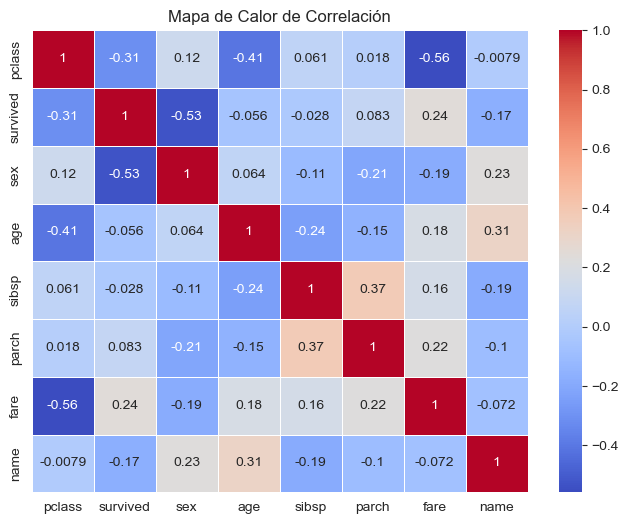

In [272]:
correlation_matrix = data[['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare','name']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Correlación")

## **Feature Engineering & Data Cleaning**

In [273]:
data['age_band']=0
data.loc[data['age']<=16,'age_band']=0
data.loc[(data['age']>16)&(data['age']<=32),'age_band']=1
data.loc[(data['age']>32)&(data['age']<=48),'age_band']=2
data.loc[(data['age']>48)&(data['age']<=64),'age_band']=3
data.loc[data['age']>64,'age_band']=4

In [274]:
data['age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,count
age_band,
1,524
0,397
2,269
3,106
4,13


In [275]:
data['fare_range']=pd.qcut(data['fare'],4)
data.groupby(['fare_range'])['survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,survived
fare_range,
"(-0.001, 7.896]",0.228487
"(7.896, 14.454]",0.284375
"(14.454, 31.275]",0.435976
"(31.275, 512.329]",0.585139


In [276]:
data['initial'] = data['name']
data["fare_range"] = label_encoder.fit_transform(data["fare_range"])
data = data.drop(columns=['fare','age','name'])

In [277]:

data.head(10)

,pclass,survived,sex,sibsp,parch,embarked,age_band,fare_range,initial
0,1,1,0,0,0,2,1,3,9
1,1,1,1,1,2,2,0,3,8
2,1,0,0,1,2,2,0,3,9
3,1,0,1,1,2,2,1,3,12
4,1,0,0,1,2,2,1,3,13
5,1,1,1,0,0,2,2,2,12
6,1,1,0,1,0,2,3,3,9
7,1,0,1,0,0,2,2,0,12
8,1,1,0,2,0,2,3,3,13
9,1,0,1,0,0,0,4,3,12


## **Modelado**

Se realizara un modelo de clasificación por lo tanto se opto por realizar los siguientes 3 modelos:
- LogisticRegression
- RandomForestClassifier
- DecisionTreeClassifier
- KNeighborsClassifier
- Radial Support Vector Machines

In [278]:
X = data.drop(columns=["survived"])
Y = data["survived"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [279]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(X_train,y_train)
SVM_lg=model.predict(X_test)
print("Classification_Report: \n")
print(classification_report(y_test,SVM_lg))

Classification_Report: 

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       163
           1       0.84      0.73      0.78        99

    accuracy                           0.84       262
   macro avg       0.84      0.82      0.83       262
weighted avg       0.84      0.84      0.84       262



In [280]:
model_Logistic = LogisticRegression(max_iter=300)
model_Logistic.fit(X_train, y_train)
y_pred_lg = model_Logistic.predict(X_test)
print("Classification_Report: \n")
print(classification_report(y_test,y_pred_lg))

Classification_Report: 

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       163
           1       0.78      0.69      0.73        99

    accuracy                           0.81       262
   macro avg       0.80      0.79      0.79       262
weighted avg       0.81      0.81      0.81       262



In [281]:
model_RamdonForest = RandomForestClassifier(n_estimators=100)
model_RamdonForest.fit(X_train, y_train)
y_pred_rf = model_RamdonForest.predict(X_test)
print("Classification_Report: \n")
print(classification_report(y_test,y_pred_rf))

Classification_Report: 

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.81      0.70      0.75        99

    accuracy                           0.82       262
   macro avg       0.82      0.80      0.81       262
weighted avg       0.82      0.82      0.82       262



In [282]:
model_Tree = DecisionTreeClassifier()
model_Tree.fit(X_train,y_train)
y_pred_tree = model_Tree.predict(X_test)
print("Classification_Report: \n")
print(classification_report(y_test,y_pred_tree))

Classification_Report: 

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.84      0.67      0.74        99

    accuracy                           0.82       262
   macro avg       0.83      0.79      0.80       262
weighted avg       0.83      0.82      0.82       262



In [283]:
model=KNeighborsClassifier() 
model.fit(X_train,y_train)
y_pred_KNe=model.predict(X_test)
print("Classification_Report: \n",classification_report(y_test,y_pred_tree))

Classification_Report: 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.84      0.67      0.74        99

    accuracy                           0.82       262
   macro avg       0.83      0.79      0.80       262
weighted avg       0.83      0.82      0.82       262



## **Importancias de Caracteristicas**

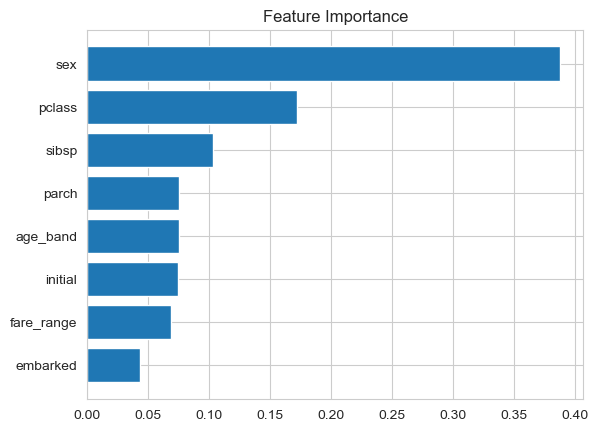

In [284]:
feature_importance = model_Tree.feature_importances_
sorted_idx = np.argsort(feature_importance)
features = X.columns
plt.figure()
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features[sorted_idx])
plt.title('Feature Importance')
plt.show()

In [285]:
X_train.head(2)

,pclass,sex,sibsp,parch,embarked,age_band,fare_range,initial
269,1,1,0,0,2,0,2,12
857,3,1,0,0,2,1,0,12


In [286]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [287]:
pca.components_

array([[ 0.01758097, -0.06739158,  0.1836215 ,  0.10322278, -0.0265012 ,
        -0.14368541,  0.08602137, -0.96022393],
       [-0.41809088, -0.07479446,  0.32533281,  0.26890813, -0.06532694,
         0.26258214,  0.74453323,  0.11792395],
       [ 0.40204019, -0.00823399,  0.6295955 ,  0.36791635,  0.17541134,
        -0.47053347, -0.03815047,  0.23003613],
       [ 0.12022415,  0.02063398,  0.08633601,  0.13368815,  0.77329346,
         0.57856758, -0.13857661, -0.08869761],
       [ 0.21615246, -0.12271942, -0.25145366,  0.76098299, -0.40120615,
         0.30871232, -0.19894738, -0.00665452],
       [-0.14345969, -0.05661675, -0.58994622,  0.34106544,  0.44775422,
        -0.49356146,  0.26012491,  0.00999777],
       [-0.1171001 ,  0.9758422 ,  0.00518977,  0.17129263, -0.03800368,
        -0.01314458, -0.02260281, -0.05023466],
       [ 0.75351561,  0.13724828, -0.21284945, -0.19757684, -0.05816932,
         0.12322315,  0.55664687, -0.02474453]])

In [288]:
pca.explained_variance_ratio_

array([0.39717712, 0.22355296, 0.13939807, 0.08080634, 0.05988017,
       0.05817078, 0.02247832, 0.01853625])

In [289]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
print(var_cumu)

[0.39717712 0.62073008 0.76012814 0.84093448 0.90081465 0.95898543
 0.98146375 1.        ]


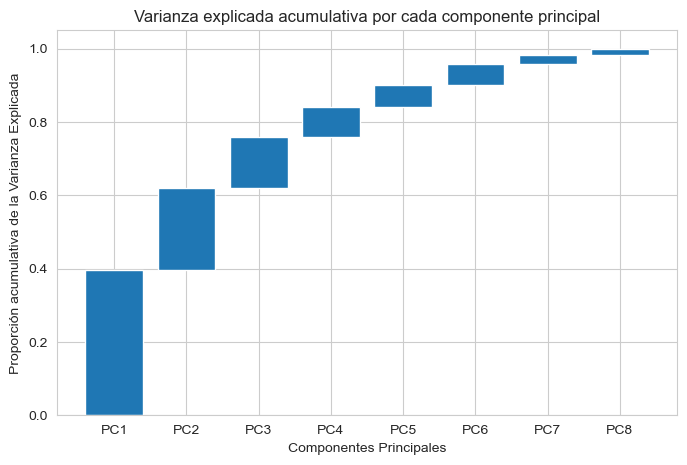

In [290]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Nombres de los componentes
components = [f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))]

# Creando el gráfico de barras apiladas
plt.figure(figsize=(8, 5))

# Barra base (la primera barra)
plt.bar(components, [cumulative_variance_ratio[0]] + list(np.diff(cumulative_variance_ratio)), 
        bottom=[0] + list(cumulative_variance_ratio[:-1]))

plt.title('Varianza explicada acumulativa por cada componente principal')
plt.xlabel('Componentes Principales')
plt.ylabel('Proporción acumulativa de la Varianza Explicada')
plt.show()

Para reducir la cantidad de variables se decidio usar al menos 6 componentes debido a que los restantes no aportanban suficiente varianza al modelo.
## **Modelo predictivo usando PCA**

In [291]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=6)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(1047, 6)

In [292]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(6, 6)

In [293]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(262, 6)

In [294]:
learner_pca = LogisticRegression(max_iter=500)
learner_pca.fit(df_train_pca, y_train)
y_log_pca = model_Logistic.predict(X_test)
print("Classification_Report: \n")
print(classification_report(y_test,y_log_pca))

Classification_Report: 

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       163
           1       0.78      0.69      0.73        99

    accuracy                           0.81       262
   macro avg       0.80      0.79      0.79       262
weighted avg       0.81      0.81      0.81       262



## **Conclusiones**

Hemos recorrido vastas extensiones de datos, revelando patrones y matices en la historia del Titanic. Ahora, nos preparamos para tejer estos datos en una narrativa, una historia que no solo informará, sino que también rendirá homenaje a las vidas que se perdieron en esa noche fatídica. Nuestro viaje a través de los datos del Titanic es más que un análisis; es una conexión con el pasado, una ventana a la complejidad de la condición humana en medio de la tragedia.

En nuestra travesía, descubrimos que la superioridad en la supervivencia de las mujeres sobre los hombres es evidente, respaldando la prioridad dada a las mujeres durante la evacuación. La mayoría de los pasajeros viajaban solos, sin hermanos, cónyuges, padres o hijos a bordo, y aquellos que llevaban a algún familiar tendían a tener solo uno.

La relación entre el número de hermanos/cónyuges y el de padres/hijos indica cierta coherencia en los lazos familiares de los pasajeros. Asimismo, el análisis de la tarifa del boleto revela una correlación directa entre la clase del pasajero y el monto pagado, con una clara ventaja de supervivencia para aquellos que pagaron tarifas más altas, predominantemente ubicados en la primera clase.

El perfil de edad de los pasajeros muestra una distribución normal sesgada hacia la izquierda, indicando que la mayoría de la población era joven. Además, se observa que las personas mayores tienden a pertenecer a clases más altas, sugiriendo una relación entre la edad y la posición socioeconómica.

En cuanto a los modelos de predicción, la RandomForestClassifier y KNeighborsClassifier ofrecen métricas similares.

## **Notas de la Entrega**

En esta entrega no se realizó variables sinteticas porque anteriormente ya se realizaron, tal como la creación de titulos apartir de los nombres de los pasajero. Y se pudo apreciar que con la reducción de variables el resultado es similar al obtenido con la totalidad del modelos. Por lo tanto se concluye que la aplicacion del PCA es la correcta.